In [10]:
%matplotlib inline
%pip install lightkurve
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt
import lightkurve as lk

## Planet properties -> Radius

In [12]:
TIC = 'TIC 55525572'

In [13]:
available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')[0:9] # Search the available data, selecting all data from first year of TESS data sectors
lc_collection = available_data_select.download_all().stitch() # Download the selected data, stitching the data from the different sectors together

# Define the orbital period & time of first transit event (T0)
period = 83.8979
t0 = 2125.847 # date on ExoFOP

# Phase fold the light curve
lc_phased = lc_collection.fold(period = period, epoch_time = t0)

# Bin the lightcurve to 15 minutes
lc_phased_binned = lc_phased.bin(15/24/60)

(0.996, 1.004)

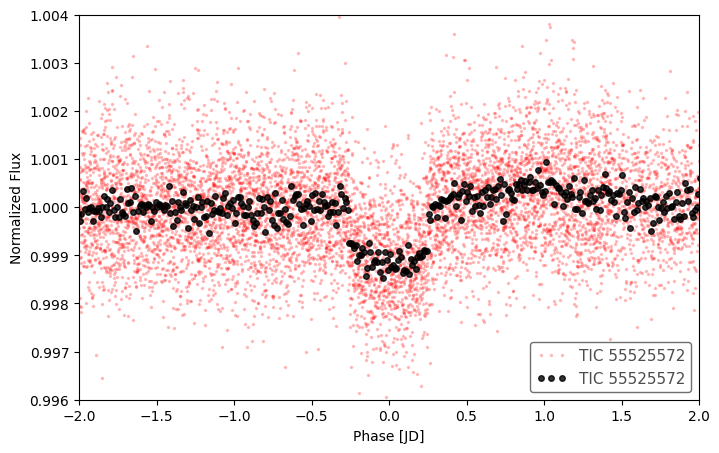

In [14]:
# Plot the binned and unbinned phase folded lightcurve on the same figure
fig, ax = plt.subplots(figsize = (8,5))
lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'red', alpha = 0.2, markersize = 3)
lc_phased_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'k', alpha = 0.8, markersize = 4)

plt.axhline(0.9988)
plt.xlim(-2, 2)
plt.ylim(0.996, 1.004)

In [15]:
from astropy import units as u
import numpy as np

In [17]:
# Determine the depth of the transit based on phase folded figure
transit_depth = 1 - 0.9988 # Change 0.9988 for other targets
R_star = 2.04354 * u.Rsun # Radius of parent star in transit compared to radius of our sun
r_pl_solar_radius = np.sqrt(transit_depth) * R_star # Determine depth of the planet in solar radii
r_pl_solar_radius

<Quantity 0.0707903 solRad>

In [18]:
r_pl_earth_radius = r_pl_solar_radius.to(u.Rearth) # Convert the radius of the planet to compare it to Earth radii
r_pl_earth_radius

<Quantity 7.72154924 earthRad>

In [ ]:
def planet_radius(intransit_flux, stellar_radius):
    transit_depth = 1 - intransit_flux
    R_star = stellar_radius * u.Rsun
    r_pl_solar_radius = np.sqrt(transit_depth) * R_star
    r_pl_earth_radius = r_pl_solar_radius.to(u.Rearth)
    print ("Radius of the planet: {} Earth radii".format(round(r_pl_Earth, 2)))

In [ ]:
planet_radius(0.9988, 2.04354)

Deepnote file + further documentation: 
https://colab.research.google.com/drive/19qF5n53mx2cLDoqx2TyJAJlfdfdvHjXm?usp=sharing#scrollTo=3SyMADPvl1qL 